## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

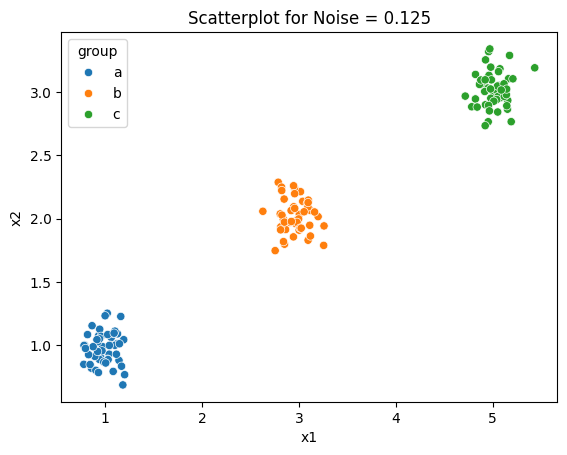

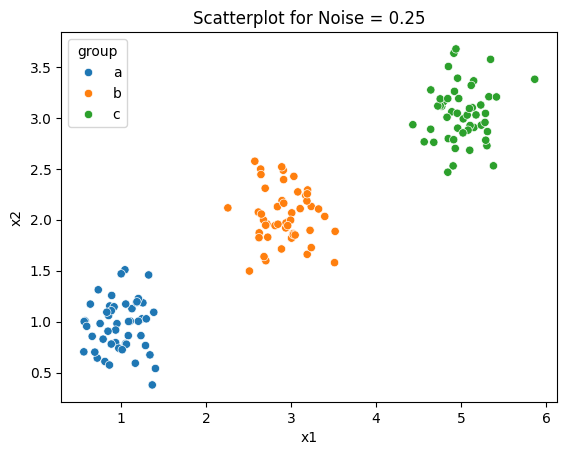

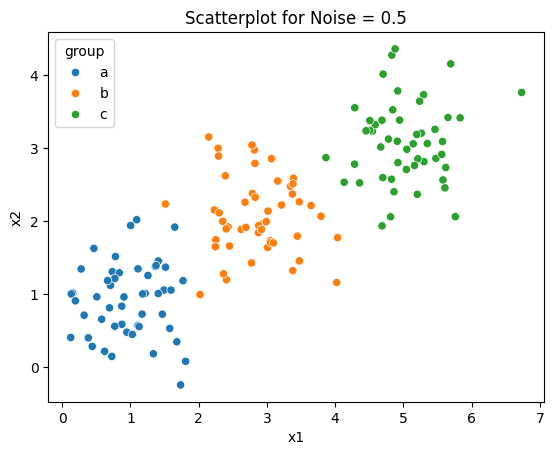

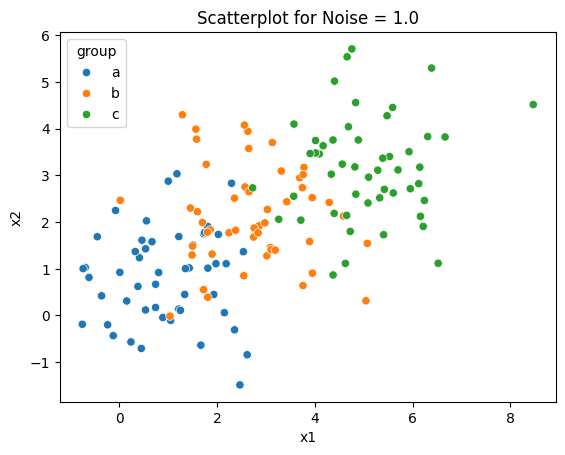

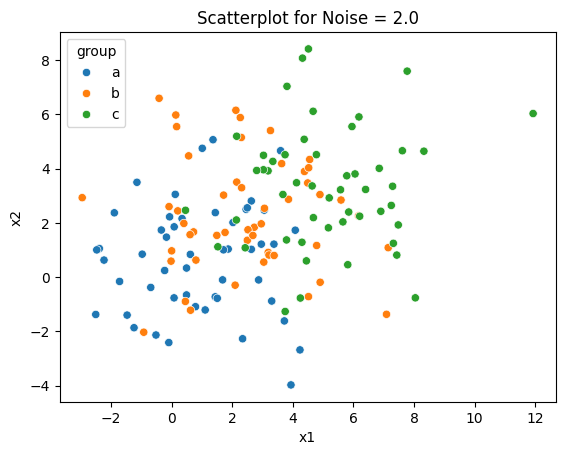

In [7]:
# List of datasets and their noise levels
datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]

# Loop through datasets to create scatterplots
for i in range(len(datasets)):
  df = datasets[i] # Get dataset
  noise = noise_levels[i] # Get noise level
  sns.scatterplot(x = df['x1'], y = df['x2'], hue = df['group'])
  plt.title(f"Scatterplot for Noise = {noise}")
  plt.show()

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

*   As the level of noise increases, the presence of an elbow becomes less apparent.
*   For low noise levels (0.125, 0.25, 0.5), there is a clear elbow around k = 3, meaning the SSE decreases sharply up to this point and then the scree curve flattens out.
*   For higher noise levels (1.0, 2.0), the scree curve becomes smoother, making it harder to identify a distinct elbow point. At these levels choosing k is ambiguous.

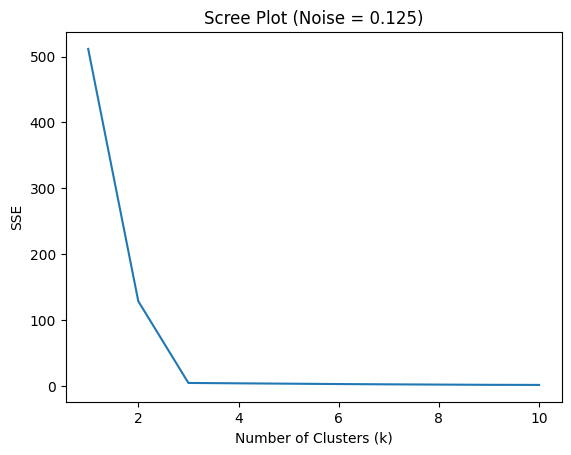

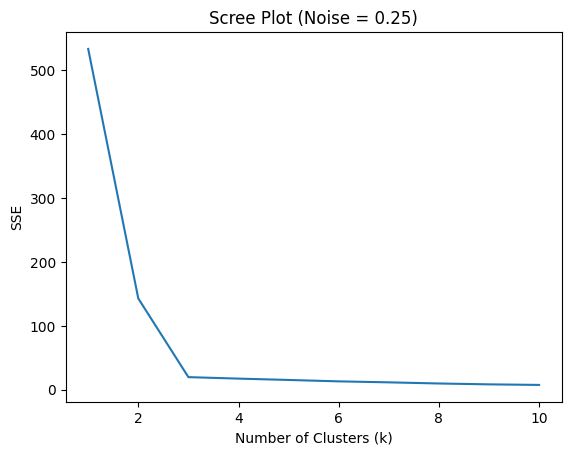

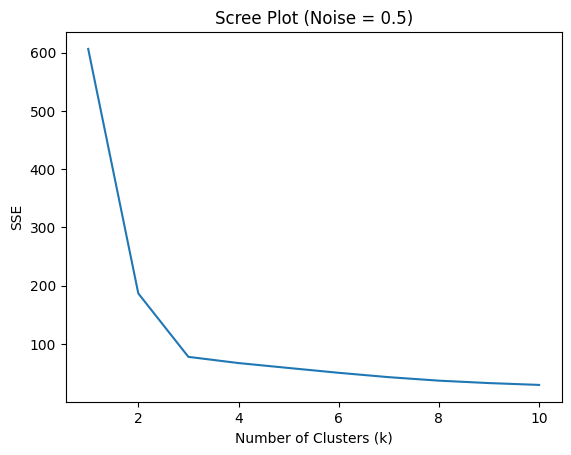

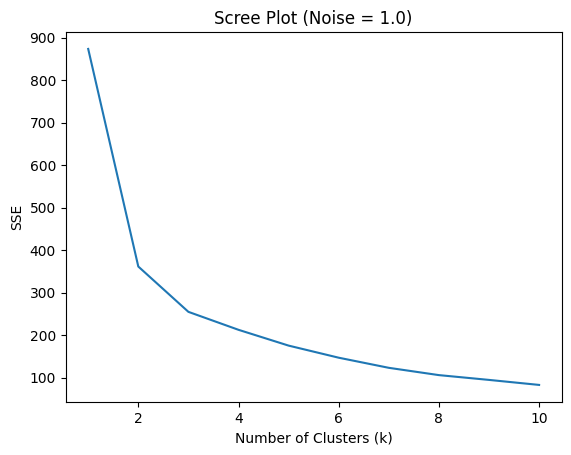

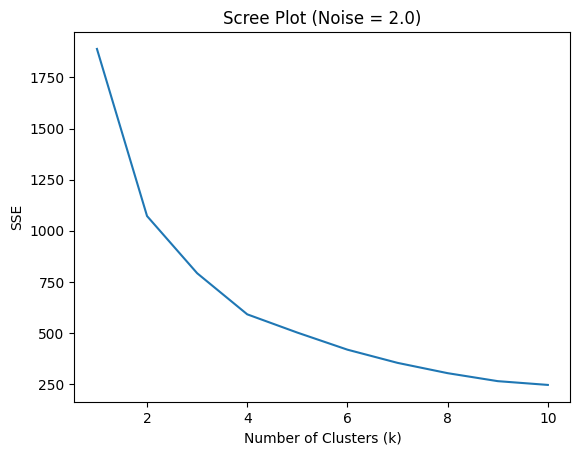

In [12]:
from sklearn.cluster import KMeans

# List of datasets and their noise levels
datasets = [df0_125, df0_25, df0_5, df1_0, df2_0]
noise_levels = [0.125, 0.25, 0.5, 1.0, 2.0]

# Create scree plots for each dataset
for i in range(len(datasets)):
  df = datasets[i]
  noise = noise_levels[i]
  X = df[['x1', 'x2']]

  # Compute SSE for k values from 1 to 10
  k_bar = 10
  SSE = []
  for k in range(k_bar):
    model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0) # Create a model for k
    model = model.fit(X)
    SSE.append(model.inertia_) # Store SSE values

  # Create scree plot
  sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title(f"Scree Plot (Noise = {noise})")
  plt.xlabel('Number of Clusters (k)')
  plt.ylabel('SSE')
  plt.show()


4. Explain the intuition of the elbow, using this numerical simulation as an example.

*   The intuition of the elbow is used to determine the optimal number of clusters (k) in K-Means clustering. It works by plotting the Sum of Squared Errors (SSE) against k and identifying the point where adding more clusters no longer significantly reduces SSE.
*   This point is called the elbow because it looks like a bent arm, where SSE drops steeply at first but then flattens out.
*   When k is small, each cluster must cover a large amount of points that may not be very close in distance, leading to a high SSE. As k increases, clusters become smaller and more specific, reducing SSE.
*   The elbow marks the point where the SSE curve starts flattening, indicating an optimal amount of clusters.
*   In this simulation, when there was low noise, there is a clear elbow at k = 3, and beyond 3, the curve flattens, meaning additional clusters don't improve the model significantly.
*   But for higher noise levels, the elbow point became less clear indicating that the clusters are harder to distinguish, as the points are more spread out and overlapping (as we can see in the scatter plots).

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?


In [13]:
# Load data
df = pd.read_csv('./data/SIPRI Military Expenditure Database.csv')

# Filter the rows to select 2020
df = df[df['Year'] == 2020]

# Drop all rows with missing values
df = df.dropna()

# Display a first few rows and info
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 32 to 5880
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           148 non-null    int64  
 1   Year                            148 non-null    int64  
 2   Country                         148 non-null    object 
 3   Spending (2020 USD)             148 non-null    float64
 4   Percent of GDP                  148 non-null    float64
 5   Percent of Government Spending  148 non-null    float64
 6   Spending per Capita             148 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 9.2+ KB
None


,index,Year,Country,Spending (2020 USD),Percent of GDP,Percent of Government Spending,Spending per Capita
32,32,2020,Afghanistan,279.576955,0.013589,0.049728,7.181899
66,66,2020,Albania,187.433234,0.012583,0.037952,65.126211
100,100,2020,Algeria,9708.277440,0.066600,0.173924,221.392384
134,134,2020,Angola,993.594405,0.014442,0.074624,30.231680
168,168,2020,Argentina,2830.929705,0.007269,0.017268,62.636731


2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`).

What do you see?
*   I see pretty distinct clustering, but not extremely clear since the elbow point is not very distinct.
*   One cluster (cluster 3) is an outlier with the highest spending and the other 3 clusters have much lower spending.

Where is the United States?
*   The US is in cluster 3 which has the highest mean total spending, the highest per capita spending, and is the only point in this cluster meaning the US is an outlier.

Do you notice any patterns in the cluster membership?
*   Cluster 0 has moderate mean spending but lower spending per capita.
*   Cluster 1 has a slightly higher mean spending than cluster 0 but a much higher spending per capita.
*   Cluster 2 consists of the lowest-spending countries with the lowest spending per capita as well.
*   Cluster 3 is an extreme outlier, indicating that the US has a significantly higher military budget and per capita spending compared to other countries.

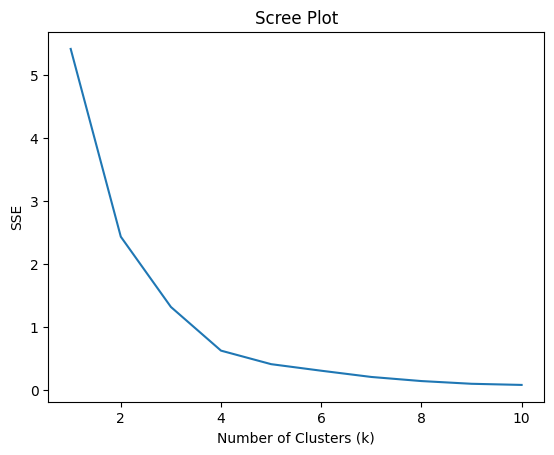

In [17]:
# Max-min function
def maxmin(x):
  x = (x - min(x)) / (max(x) - min(x))
  return x

vars = ['Spending (2020 USD)', 'Spending per Capita']

# Normalize variables
X = df.loc[:, vars]
X = X.apply(maxmin)

# Scree plot
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X)
  SSE.append(model.inertia_)

# Create scree plot
sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

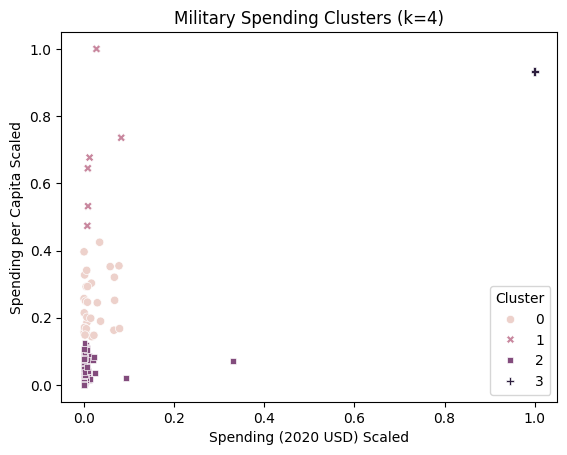

In [28]:
# Scatterplot
kstar = 4
model = KMeans(n_clusters = kstar, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(X)
g_hat = model.predict(X)
df['g_hat'] = g_hat # add cluster assignments to df

sns.scatterplot(x = X.iloc[:, 0], y = X.iloc[:, 1], hue = df["g_hat"], style = df["g_hat"])
plt.xlabel("Spending (2020 USD) Scaled")
plt.ylabel("Spending per Capita Scaled")
plt.title("Military Spending Clusters (k=4)")
plt.legend(title="Cluster")
plt.show()

In [16]:
# Describe table conditional on cluster membership
df.groupby("g_hat")[["Spending (2020 USD)", "Spending per Capita"]].describe()

Spending (2020 USD)                                              \
                    count           mean           std            min   
g_hat                                                                   
0                    30.0   17077.591354  20583.053357     405.790494   
1                     6.0   19443.362047  22861.507114    6095.708713   
2                   111.0    4859.185065  25405.739131       8.622460   
3                     1.0  778397.200000           NaN  778397.200000   

                                                                   \
                 25%            50%            75%            max   
g_hat                                                               
0        2294.039665    5857.060906   26296.001003   61712.537169   
1        7023.251766    8624.225729   18857.070183   64558.400000   
2         130.010211     382.464677    2297.032353  257973.429834   
3      778397.200000  778397.200000  778397.200000  778397.200000   

      Spending per Capita                                                     \
                    count         mean         std          min          25%   
g_hat                                                                          
0                    30.0   607.478618  206.928757   362.467076   422.208252   
1                     6.0  1706.721916  466.375705  1193.598730  1412.083201   
2                   111.0    80.061470   83.501824     0.580129    14.880549   
3                     1.0  2351.631858         NaN  2351.631858  2351.631858   

                                              
               50%          75%          max  
g_hat                                         
0       579.004604   757.328513  1070.623322  
1      1665.447478  1817.219993  2520.398541  
2        47.056944   125.387558   314.201312  
3      2351.631858  2351.631858  2351.631858

3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?

*   k = 3 makes the clusters a lot more distinct in this scatterplot. 
*   Cluster 0 has a moderate mean percent of government spending (0.098) as well as a moderate percent of GDP (0.027). This cluster includes 39 counties.
*   Cluster 1 

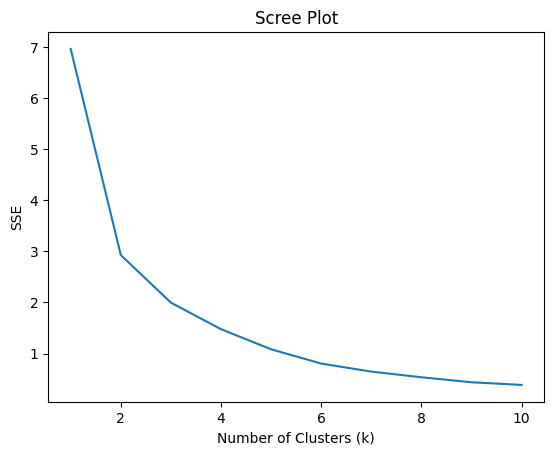

In [23]:
vars = ['Percent of Government Spending', 'Percent of GDP']

# Normalize variables
X2 = df.loc[:, vars]
X2 = X2.apply(maxmin)

# Scree plot
k_bar = 10
SSE = []
for k in range(k_bar):
  model = KMeans(n_clusters = k + 1, max_iter = 300, n_init = 10, random_state = 0)
  model = model.fit(X2)
  SSE.append(model.inertia_)

# Create scree plot
sns.lineplot(x = np.arange(1, k_bar + 1), y = SSE).set_title('Scree Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.show()

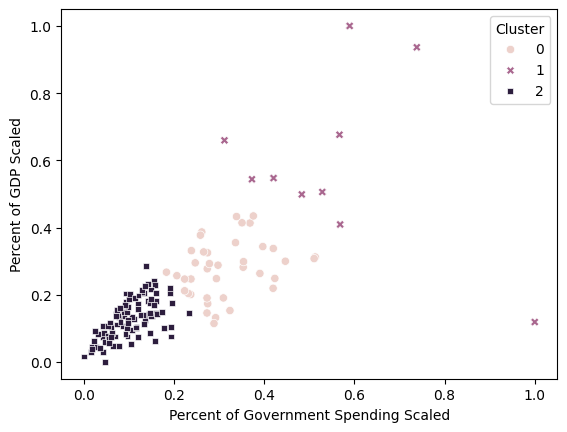

In [31]:
# Scatterplot
kstar = 3
model = KMeans(n_clusters = kstar, max_iter = 300, n_init = 10, random_state = 0)
model = model.fit(X2)
g_hat2 = model.predict(X2)
df['g_hat2'] = g_hat2 # add cluster assignments to df

sns.scatterplot(x = X2.iloc[:, 0], y = X2.iloc[:, 1], hue = df["g_hat2"], style = df["g_hat2"])
plt.xlabel("Percent of Government Spending Scaled")
plt.ylabel("Percent of GDP Scaled")
plt.legend(title = "Cluster")
plt.show()

In [32]:
# Describe table conditional on cluster membership
df.groupby("g_hat2")[['Percent of Government Spending', 'Percent of GDP']].describe()

Percent of Government Spending                                          \
                                count      mean       std       min       25%   
g_hat2                                                                          
0                                39.0  0.098683  0.024125  0.059520  0.082430   
1                                10.0  0.171289  0.058725  0.097882  0.135010   
2                                99.0  0.035777  0.014549  0.004896  0.025921   

                                     Percent of GDP                      \
             50%       75%       max          count      mean       std   
g_hat2                                                                    
0       0.092044  0.112633  0.157918           39.0  0.027412  0.008191   
1       0.168248  0.179081  0.303027           10.0  0.058071  0.024867   
2       0.034261  0.047402  0.074624           99.0  0.012664  0.005681   

                                                          
             min       25%       50%       75%       max  
g_hat2                                                    
0       0.011317  0.021254  0.027781  0.032461  0.042810  
1       0.011742  0.049297  0.053729  0.066190  0.098470  
2       0.000054  0.008393  0.013191  0.016752  0.028132

4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?

*   _
*   _
*   _
*   _

5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

*   _
*   _
*   _
*   _


**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?